In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
book = pd.read_csv("C:/Users/SIDDHI/Desktop/Book Recommendation System/data/Books.csv")
rating = pd.read_csv("C:/Users/SIDDHI/Desktop/Book Recommendation System/data/Ratings.csv")
user = pd.read_csv("C:/Users/SIDDHI/Desktop/Book Recommendation System/data/Users.csv")


C:\Users\SIDDHI\AppData\Local\Temp\ipykernel_5348\514274717.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("C:/Users/SIDDHI/Desktop/Book Recommendation System/data/Books.csv")


In [3]:
print("Book shape: ",book.shape)
book.head(3)

Book shape:  (271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [4]:
print("Rating shape: ",rating.shape)
rating.head(3)

Rating shape:  (1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [5]:
print("User shape: ",user.shape)
user.head(3)

User shape:  (278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [6]:
print("Books:\n",book.isnull().sum())
print("Ratings:\n",rating.isnull().sum())
print("Users:\n",user.isnull().sum())

Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Users:
 User-ID          0
Location         0
Age         110762
dtype: int64


In [7]:
rwn = rating.merge(book,on="ISBN")

In [8]:
print(rwn.shape)
rwn.head(3)

(1031136, 10)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [9]:
num_rating_df = rwn.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [10]:
num_rating_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)

In [11]:
print(num_rating_df.shape)
num_rating_df.head(5)

(241071, 2)


,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [12]:
avg_rating_df = rwn.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
print(avg_rating_df.shape)
avg_rating_df.head(5)

(241071, 2)


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


# Calculate popularity

In [13]:
pop_df = num_rating_df.merge(avg_rating_df, on="Book-Title")
pop_df.head(10)


,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
6,Dark Justice,1,10.00
7,Deceived,2,0.00
8,Earth Prayers From around the World: 365 Pray...,10,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,4,5.00


In [14]:
pop_df = pop_df[pop_df['num_rating'] >= 250].sort_values('avg_rating', ascending=False).head(50)


In [15]:
pop_df

,Book-Title,num_rating,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [16]:
pop_df.merge(book,on="Book-Title").drop_duplicates('Book-Title')

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


In [17]:
pop_df = pop_df.merge(book,on="Book-Title").drop_duplicates('Book-Title')[['Book-Title','Book-Author','Publisher','Image-URL-M','num_rating','avg_rating']]

In [18]:
pop_df.head()

,Book-Title,Book-Author,Publisher,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [19]:
pop_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

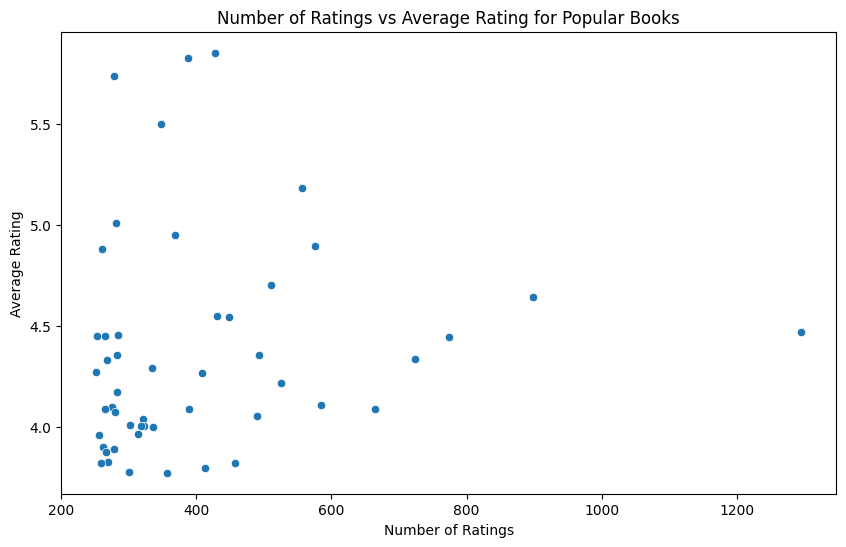

In [20]:
# Plotting the number of ratings vs average rating for popular books
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_rating', y='avg_rating', data=pop_df)
plt.title('Number of Ratings vs Average Rating for Popular Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()


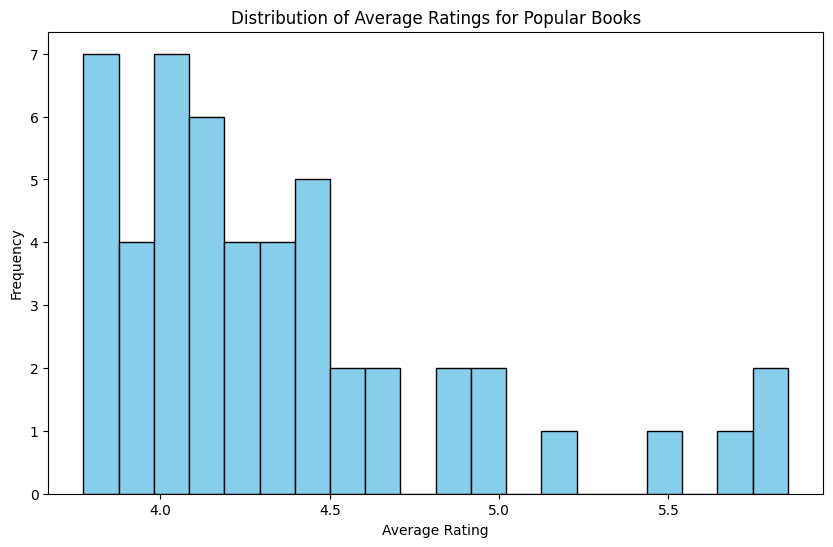

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(pop_df['avg_rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Ratings for Popular Books')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


# Collaborative filtering

In [22]:
# Filter users who rated more than 200 books
x = rwn.groupby('User-ID').count()['Book-Rating'] > 200
plu = x[x].index
filter_rate = rwn[rwn['User-ID'].isin(plu)]

In [23]:
# Filter books with more than 50 ratings
y = filter_rate.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_book = y[y].index
final_rate = filter_rate[filter_rate['Book-Title'].isin(famous_book)]

In [24]:
# Pivot table for collaborative filtering
pt = final_rate.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")
pt.fillna(0, inplace=True)

In [25]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(pt)

# Recommendation Function

In [28]:
# Define function to recommend similar books
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(cosine_sim[index])), key=lambda x: x[1], reverse=True)[1:6]
    for i in similar_items:
        print(pt.index[i[0]])

recommend('1984')


Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [29]:
recommend('Brave New World')

1984
How to Be Good
Naked
Five Quarters of the Orange
Love in the Time of Cholera (Penguin Great Books of the 20th Century)


# Save Data 

In [30]:
import pickle
pickle.dump(pop_df,open('C:/Users/SIDDHI/Desktop/Book Recommendation System/models/popular.pkl','wb'))

In [33]:
def recommend1(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_item = sorted(list(enumerate(cosine_sim[index])),key=lambda x:x[1],reverse=True)[1:6]
    data = []
    for i in similar_item:
        item = []
        temp_df = book[book['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
    return data

In [34]:
recommend1('Harry Potter and the Goblet of Fire (Book 4)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg']]

In [35]:
recommend1('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [36]:
recommend1('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['Middlesex: A Novel',
  'Jeffrey Eugenides',
  'http://images.amazon.com/images/P/0312422156.01.MZZZZZZZ.jpg']]

In [38]:

# Save pivot table, book dataframe, and cosine similarity matrix
pickle.dump(pt,open('C:/Users/SIDDHI/Desktop/Book Recommendation System/models/pt.pkl','wb'))
pickle.dump(book,open('C:/Users/SIDDHI/Desktop/Book Recommendation System/models/book.pkl','wb'))
pickle.dump(cosine_sim,open('C:/Users/SIDDHI/Desktop/Book Recommendation System/models/similarity_score.pkl','wb'))